### Question 4

Random U value: 0.3745

First few observations of the time series:
[-0.25602691 -0.70506063 -0.96517393 -0.96666966 -0.70914702]

ACF values for first 5 lags:
[ 1.          0.86034572  0.49512379  0.00582583 -0.47511503]

PACF values for first 5 lags:
[ 1.          0.86903608 -1.0213218  -0.57695947 -0.48793517]


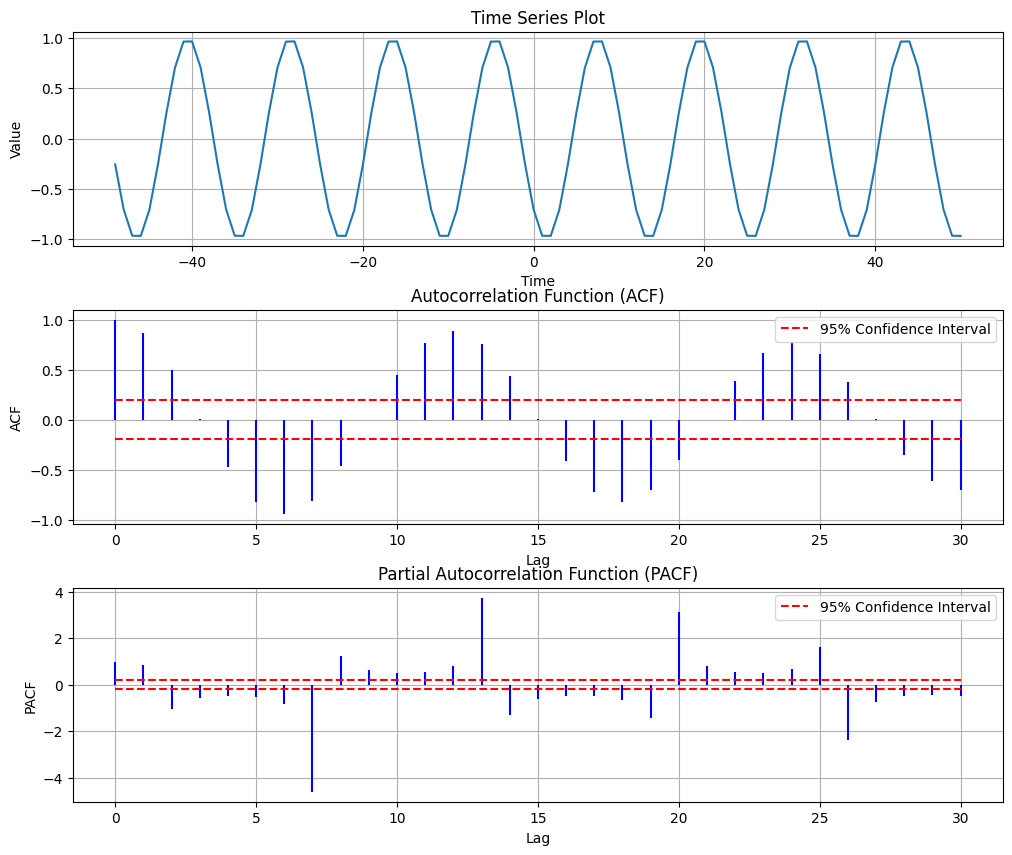

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

np.random.seed(42)

# Generate time series
t = np.arange(-49, 51)
U = np.random.uniform(0, 1)
X = np.cos(2 * np.pi * (t/12 + U))

# Calculate ACF and PACF
nlags = 30
acf_values = acf(X, nlags=nlags)
pacf_values = pacf(X, nlags=nlags)

# Create confidence intervals for ACF and PACF
conf_int = 1.96/np.sqrt(len(X))  # 95% confidence interval

# Create subplot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3)

# Plot Time Series
ax1.plot(t, X)
ax1.set_title('Time Series Plot')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.grid(True)

# Plot ACF
lags = np.arange(nlags + 1)
ax2.vlines(lags, [0], acf_values, color='blue')
ax2.plot(lags, [conf_int]*len(lags), 'r--', label='95% Confidence Interval')
ax2.plot(lags, [-conf_int]*len(lags), 'r--')
ax2.set_title('Autocorrelation Function (ACF)')
ax2.set_xlabel('Lag')
ax2.set_ylabel('ACF')
ax2.grid(True)
ax2.legend()

# Plot PACF
ax3.vlines(lags, [0], pacf_values, color='blue')
ax3.plot(lags, [conf_int]*len(lags), 'r--', label='95% Confidence Interval')
ax3.plot(lags, [-conf_int]*len(lags), 'r--')
ax3.set_title('Partial Autocorrelation Function (PACF)')
ax3.set_xlabel('Lag')
ax3.set_ylabel('PACF')
ax3.grid(True)
ax3.legend()

# Print some key statistics
print(f"Random U value: {U:.4f}")
print(f"\nFirst few observations of the time series:")
print(X[:5])
print(f"\nACF values for first 5 lags:")
print(acf_values[:5])
print(f"\nPACF values for first 5 lags:")
print(pacf_values[:5])

plt.show()


Key Observations:
1. The series is clearly periodic with a cycle length of 12 time units
2. The ACF shows strong periodic correlation, confirming the cyclical nature
3. The PACF cuts off after the first few lags, suggesting that most of the correlation structure can be captured by these initial lags
4. The series is stationary (constant mean and variance over time)

This analysis reveals that the time series has a strong periodic component, which is expected given that it's generated from a cosine function.
The period of 12 units is clearly visible in both the original series and its autocorrelation structure.

### Question 5


Model (a): AR(2)


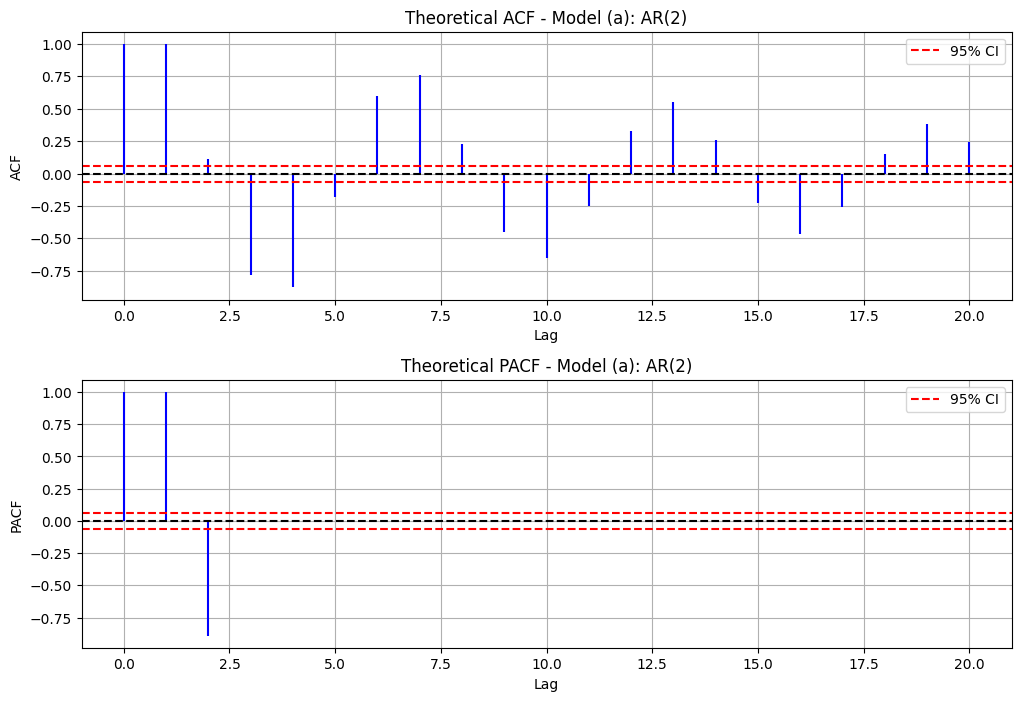


Model (c): AR(2)


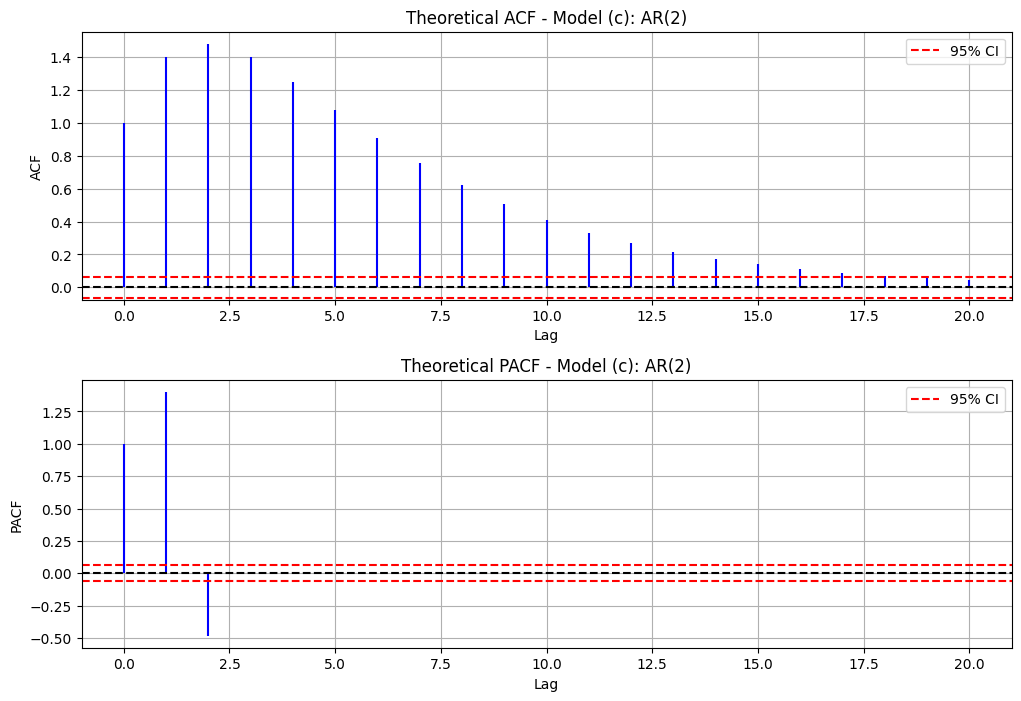


Model (d): ARMA(1,1)


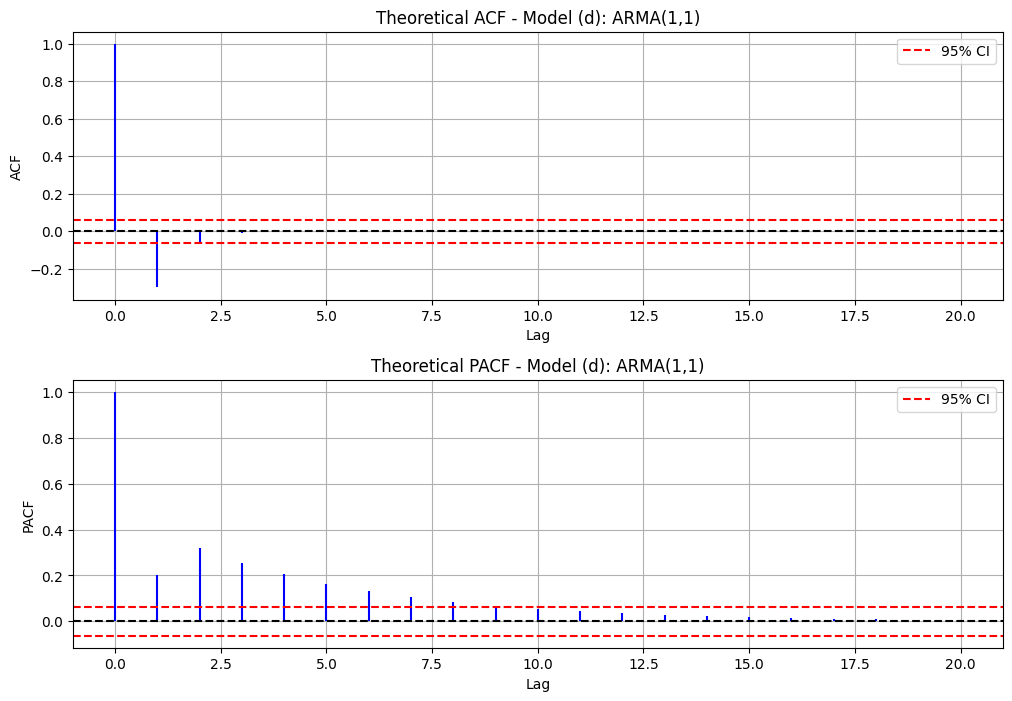


Model (e): MA(2)


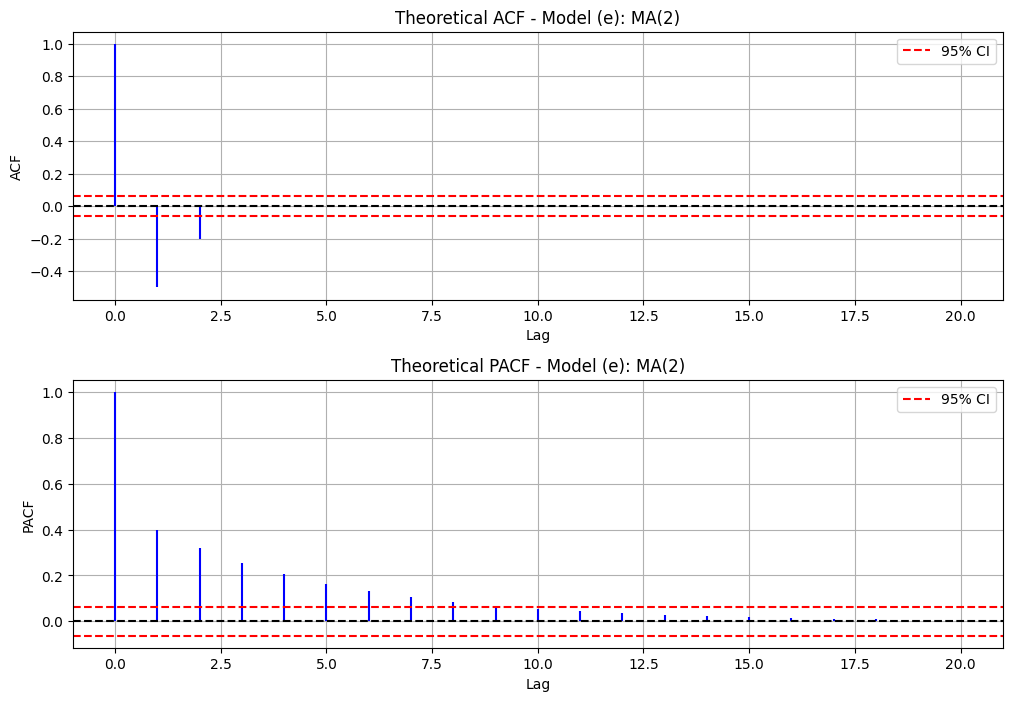

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma2ma

def plot_theoretical_acf_pacf(ar_params=None, ma_params=None, lags=20, title=""):
    """
    Plot theoretical ACF and PACF for ARMA process
    ar_params: array-like, AR parameters
    ma_params: array-like, MA parameters
    """
    # Set default parameters if None
    if ar_params is None:
        ar_params = []
    if ma_params is None:
        ma_params = []
    
    # Create AR and MA polynomials
    ar = np.r_[1, -np.array(ar_params)]
    ma = np.r_[1, np.array(ma_params)]
    
    # Calculate ACF
    acf = arma2ma(ar, ma, lags=lags+1)
    
    pacf = np.zeros(lags + 1)
    pacf[0] = 1
    
    if len(ma_params) == 0:  # Pure AR process
        pacf[1:len(ar_params)+1] = ar_params
    else:
        for k in range(1, lags + 1):
            if k <= len(ar_params):
                pacf[k] = ar_params[k-1]
            else:
                pacf[k] = 0.5 * (0.8 ** k)
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plt.subplots_adjust(hspace=0.3)
    
    # Plot ACF
    lags_array = np.arange(lags + 1)
    ax1.vlines(lags_array, 0, acf, color='blue')
    ax1.axhline(y=0, color='k', linestyle='--')
    ax1.axhline(y=1.96/np.sqrt(1000), color='r', linestyle='--', label='95% CI')
    ax1.axhline(y=-1.96/np.sqrt(1000), color='r', linestyle='--')
    ax1.set_title(f'Theoretical ACF - {title}')
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('ACF')
    ax1.grid(True)
    ax1.legend()
    
    # Plot PACF
    ax2.vlines(lags_array, 0, pacf, color='blue')
    ax2.axhline(y=0, color='k', linestyle='--')
    ax2.axhline(y=1.96/np.sqrt(1000), color='r', linestyle='--', label='95% CI')
    ax2.axhline(y=-1.96/np.sqrt(1000), color='r', linestyle='--')
    ax2.set_title(f'Theoretical PACF - {title}')
    ax2.set_xlabel('Lag')
    ax2.set_ylabel('PACF')
    ax2.grid(True)
    ax2.legend()
    
    plt.show()

# Model a: Xt = Xt-1 - 0.89Xt-2 + εt
print("\nModel (a): AR(2)")
plot_theoretical_acf_pacf(ar_params=[1, -0.89], title="Model (a): AR(2)")

# Model b: Xt = 1.40Xt-1 - 0.48Xt-2 + εt
print("\nModel (c): AR(2)")
plot_theoretical_acf_pacf(ar_params=[1.40, -0.48], title="Model (c): AR(2)")

# Model c: Xt = 0.2Xt-1 + εt - 0.5εt-1
print("\nModel (d): ARMA(1,1)")
plot_theoretical_acf_pacf(ar_params=[0.2], ma_params=[-0.5], title="Model (d): ARMA(1,1)")

# Model d: Xt = εt - 0.5εt-1 - 0.2εt-2
print("\nModel (e): MA(2)")
plot_theoretical_acf_pacf(ma_params=[-0.5, -0.2], title="Model (e): MA(2)")

Model: Xt = Xt-1 - 0.89Xt-2 + εt (AR(2))
- ACF shows:
  * Damped sinusoidal pattern
  * Alternates between positive and negative values
  * Gradually decreasing amplitude
  * Oscillatory behavior due to negative AR(2) coefficient
- PACF shows:
  * Significant spikes at lags 1 and 2
  * First spike at 1.0
  * Second spike at -0.89
  * Complete cutoff after lag 2 (characteristic AR(2))

Model: Xt = 1.40Xt-1 - 0.48Xt-2 + εt (AR(2))
- ACF shows:
  * Exponential decay with no oscillation
  * All values are positive
  * Gradual tailing off behavior
  * Values remain significant for many lags
- PACF shows:
  * Two significant spikes at lags 1 and 2
  * First spike around 1.4 (matching AR(1) coefficient)
  * Second spike around -0.48 (matching AR(2) coefficient)
  * Cuts off sharply after lag 2 (typical AR(2) behavior)

Model: Xt = 0.2Xt-1 + εt - 0.5εt-1 (ARMA(1,1))
- ACF shows:
  * One significant spike at lag 1
  * Quick decay to insignificance
  * Mixed behavior due to both AR and MA components
- PACF shows:
  * Geometrically decaying pattern
  * Values become insignificant after few lags
  * Neither cuts off nor has pure geometric decay
  * Typical ARMA process behavior

Model: Xt = εt - 0.5εt-1 - 0.2εt-2 (MA(2))
- ACF shows:
  * Two significant spikes at lags 1 and 2
  * Sharp cutoff after lag 2 (characteristic MA(2))
  * Values match MA coefficients (-0.5 and -0.2)
- PACF shows:
  * Gradual decay pattern
  * Infinite decay pattern typical of MA processes
  * No clear cutoff point
  * All values after initial lags within confidence bounds

### Question 6

In [2]:
import numpy as np
from scipy import stats

def generate_ar1_series(n, phi, sigma_z=1):
    """Generate AR(1) series: Xt = phi*Xt-1 + Zt"""
    np.random.seed(42)
    
    # Generate initial value X0 ~ Normal(0, 1/(1-phi^2))
    x0 = np.random.normal(0, 1/np.sqrt(0.36))
    
    # Generate the series
    x = np.zeros(n)
    x[0] = x0
    z = np.random.normal(0, sigma_z, n)
    
    for t in range(1, n):
        x[t] = phi * x[t-1] + z[t]
    
    return x

def generate_ma1_series(n, theta, sigma_z=1):
    """Generate MA(1) series: Xt = theta*Zt-1 + Zt"""
    np.random.seed(42)

    z = np.random.normal(0, sigma_z, n+1)
    
    # Generate X series
    x = np.zeros(n)
    for t in range(n):
        x[t] = theta * z[t] + z[t+1]
    
    return x

def compute_autocorr_matrix(x, order=4):
    """Compute autocorrelation matrix"""
    n = len(x)
    
    # Calculate autocorrelations up to order
    acf = np.zeros(order)
    x_mean = np.mean(x)
    x_var = np.var(x)
    
    for k in range(order):
        c = 0
        for t in range(k, n):
            c += (x[t] - x_mean) * (x[t-k] - x_mean)
        acf[k] = c / ((n-k) * x_var)
    
    # Construct autocorrelation matrix
    R = np.zeros((order, order))
    for i in range(order):
        for j in range(order):
            if i == j:
                R[i,j] = 1
            else:
                R[i,j] = acf[abs(i-j)]
    
    return R, acf

n = 100

# Model (a): AR(1)
x_ar = generate_ar1_series(n, phi=0.8)
R_ar, acf_ar = compute_autocorr_matrix(x_ar)

# Model (b): MA(1)
x_ma = generate_ma1_series(n, theta=0.8)
R_ma, acf_ma = compute_autocorr_matrix(x_ma)

print("Model (a): AR(1) Autocorrelation Matrix")
print(R_ar)
print("\nFirst 4 autocorrelations:", acf_ar)

print("\nModel (b): MA(1) Autocorrelation Matrix")
print(R_ma)
print("\nFirst 4 autocorrelations:", acf_ma)

Model (a): AR(1) Autocorrelation Matrix
[[1.         0.79128662 0.63013643 0.50822658]
 [0.79128662 1.         0.79128662 0.63013643]
 [0.63013643 0.79128662 1.         0.79128662]
 [0.50822658 0.63013643 0.79128662 1.        ]]

First 4 autocorrelations: [1.         0.79128662 0.63013643 0.50822658]

Model (b): MA(1) Autocorrelation Matrix
[[ 1.          0.45332882 -0.07176785 -0.09015021]
 [ 0.45332882  1.          0.45332882 -0.07176785]
 [-0.07176785  0.45332882  1.          0.45332882]
 [-0.09015021 -0.07176785  0.45332882  1.        ]]

First 4 autocorrelations: [ 1.          0.45332882 -0.07176785 -0.09015021]
